In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import warnings
import soundfile as sf
warnings.filterwarnings('ignore')
from IPython.display import Audio

In [105]:
!pip install mlxtend

In [106]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

In [107]:
paths = []
labels = []

for dirname, _, filenames in os.walk(r'C:\Users\shukl\Downloads\TESS\TESS'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1] #Split as OAF Angry
    label = label.split('.')[0] #.wav has been removed
    labels.append(label.lower())


In [108]:
#creating a 2D dataframe of label and filepath respectively
df = pd.DataFrame()
df['Emotions'] = labels
df['Path'] = paths
df.head()

Emotions                                               Path
0    angry  C:\Users\shukl\Downloads\TESS\TESS\OAF_angry\O...
1    angry  C:\Users\shukl\Downloads\TESS\TESS\OAF_angry\O...
2    angry  C:\Users\shukl\Downloads\TESS\TESS\OAF_angry\O...
3    angry  C:\Users\shukl\Downloads\TESS\TESS\OAF_angry\O...
4    angry  C:\Users\shukl\Downloads\TESS\TESS\OAF_angry\O...

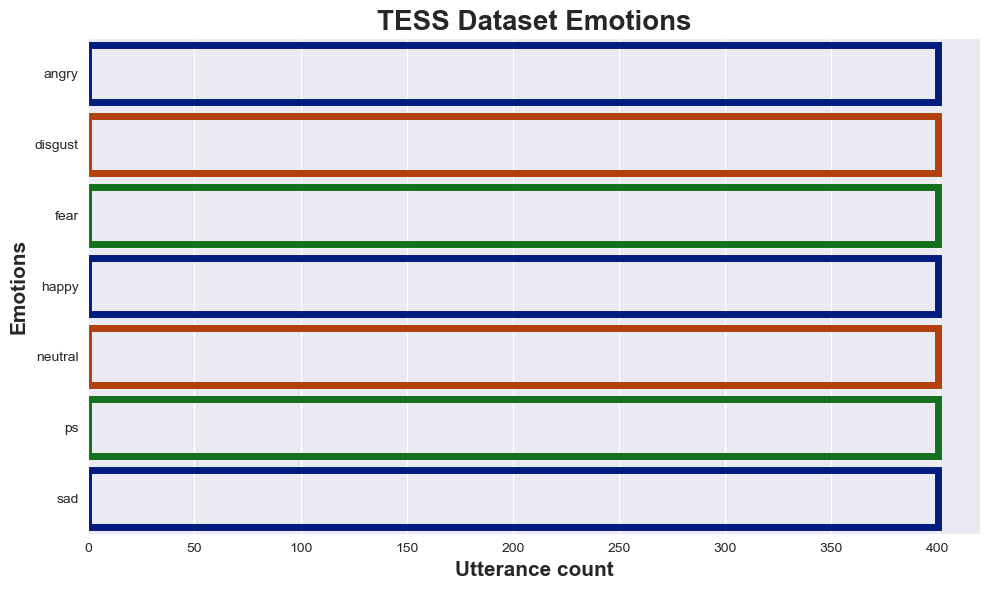

In [109]:
import seaborn as sns
sns.set_style('darkgrid')
ax = sns.countplot(df.Emotions, facecolor = (0, 0, 0, 0),  linewidth=5, edgecolor = sns.color_palette("dark", 3))

ax.axes.set_title("TESS Dataset Emotions", fontsize=20, fontweight='bold')
ax.set_xlabel("Utterance count", fontsize=15,weight='bold')
ax.set_ylabel("Emotions", fontsize=15, weight='bold')
plt.show()

In [110]:
#comapare 2 audio files
emotion_1 = 'disgust'
emotion_2 = 'sad'

path_1 = np.array(df[df['Emotions'] == emotion_1]['Path'])[0]
path_2 = np.array(df[df['Emotions'] == emotion_2]['Path'])[0]

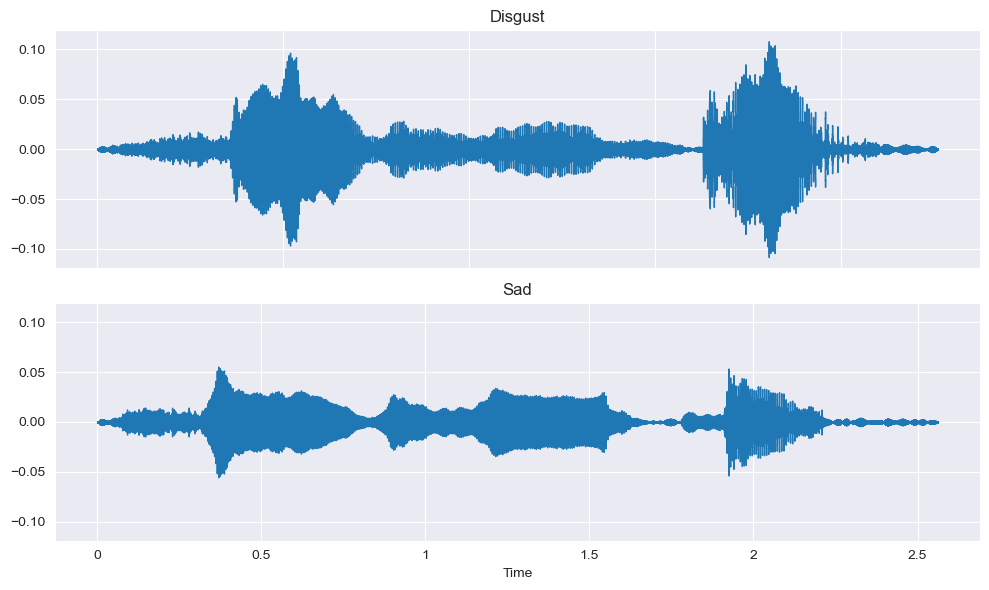

In [111]:
#waveplot showing comparision in amplitude between 2 emotions
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.autolayout'] = True
fig, ax = plt.subplots(nrows=2, sharey=True)

data_1, sampling_rate_1 = librosa.load(path_1)
librosa.display.waveshow(data_1, sr=sampling_rate_1, ax=ax[0])
ax[0].set(title = 'Disgust')
ax[0].label_outer()

data_2, sampling_rate_2 = librosa.load(path_2)
librosa.display.waveshow(data_2, sr=sampling_rate_2, ax=ax[1])
ax[1].set(title = 'Sad')
ax[1].label_outer()


In [112]:
import librosa
import plotly.graph_objects as go
import numpy as np

# Load audio files
data_1, sampling_rate_1 = librosa.load(path_1)
data_2, sampling_rate_2 = librosa.load(path_2)

# Create time axes
time_1 = np.linspace(0, len(data_1) / sampling_rate_1, num=len(data_1))
time_2 = np.linspace(0, len(data_2) / sampling_rate_2, num=len(data_2))

# Create subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_yaxes=True, subplot_titles=("Disgust", "Sad"))

# Add first waveform
fig.add_trace(go.Scatter(x=time_1, y=data_1,
                         mode='lines',
                         name='Disgust',
                         line=dict(color='blue')), row=1, col=1)

# Add second waveform
fig.add_trace(go.Scatter(x=time_2, y=data_2,
                         mode='lines',
                         name='Sad',
                         line=dict(color='red')), row=2, col=1)

# Update layout
fig.update_layout(height=600, width=1000,
                  title_text="Waveplot Comparing Amplitudes of Two Emotions",
                  showlegend=False)

fig.update_xaxes(title_text="Time (s)")
fig.update_yaxes(title_text="Amplitude")

fig.show()


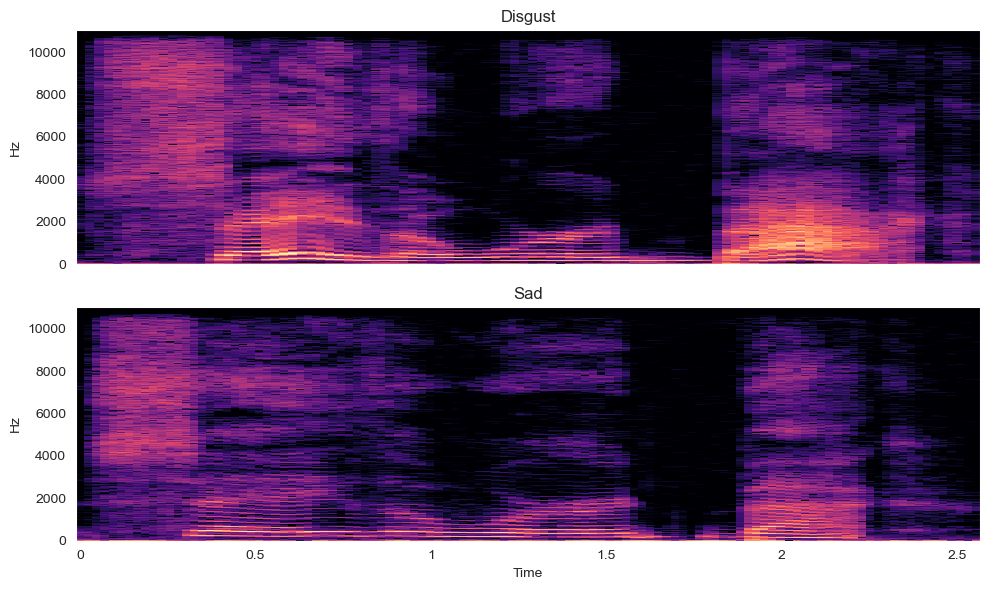

In [113]:
##short time fourier transform : stft ## to convert audio signal into frequency domain
##IMPORTANT: 

# plot showing difference in frequencies between 2 emotions
fig, ax = plt.subplots(nrows=2, sharey=False)

x_1=librosa.stft(data_1)
x_1_db=librosa.amplitude_to_db(np.abs(x_1))
x_plt_1=librosa.display.specshow(x_1_db, sr=sampling_rate_1, x_axis='time', y_axis='linear', ax=ax[0])
ax[0].set(title="Disgust")
ax[0].label_outer()

x_2=librosa.stft(data_2)
x_2_db=librosa.amplitude_to_db(np.abs(x_2)) 
x_plt_2=librosa.display.specshow(x_2_db, sr=sampling_rate_2, x_axis='time', y_axis='linear', ax=ax[1])
ax[1].set(title="Sad")  
ax[1].label_outer()

In [114]:
#data modification functions

def trim(data):
    data_trimed, _ = librosa.effects.trim(data, top_db=20) #don't consider 
    return data_trimed
'''
def custom_shift_of_pitch_audio(data, samplingRate, pitch_factor):
    return librosa.effects.pitch_shift(data, samplingRate, pitch_factor) #samples in each interval(sec) required to change continuous to discrete signal or  vice versa
'''
from librosa.effects import pitch_shift as librosa_pitch_shift

def custom_pitch_shift_audio(y, sr, n_steps):
    return librosa_pitch_shift(y=y, sr=sr, n_steps=n_steps)


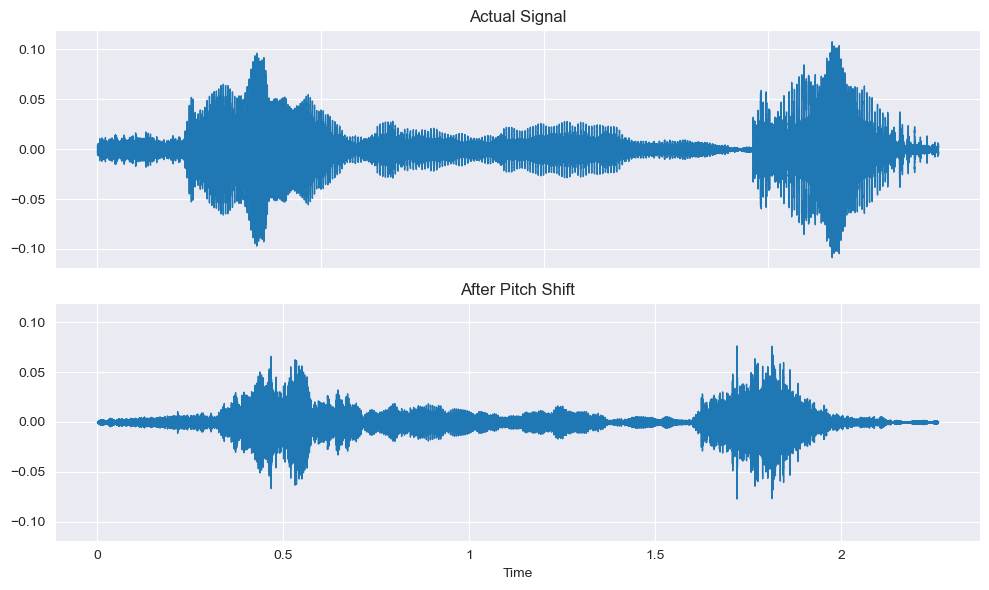

In [115]:
fig, ax = plt.subplots(nrows=2, sharey = True)

librosa.display.waveshow(trim(data_1), sr=sampling_rate_1, ax=ax[0])
ax[0].set(title= 'Actual Signal')
ax[0].label_outer()

x = librosa.effects.pitch_shift(data_1, sr=sampling_rate_1, n_steps=3) #n_steps is the number of semitones to shift

librosa.display.waveshow(x, sr=sampling_rate_1, ax=ax[1])
ax[1].set(title = 'After Pitch Shift')
ax[1].label_outer()

plt.tight_layout()

plt.show()

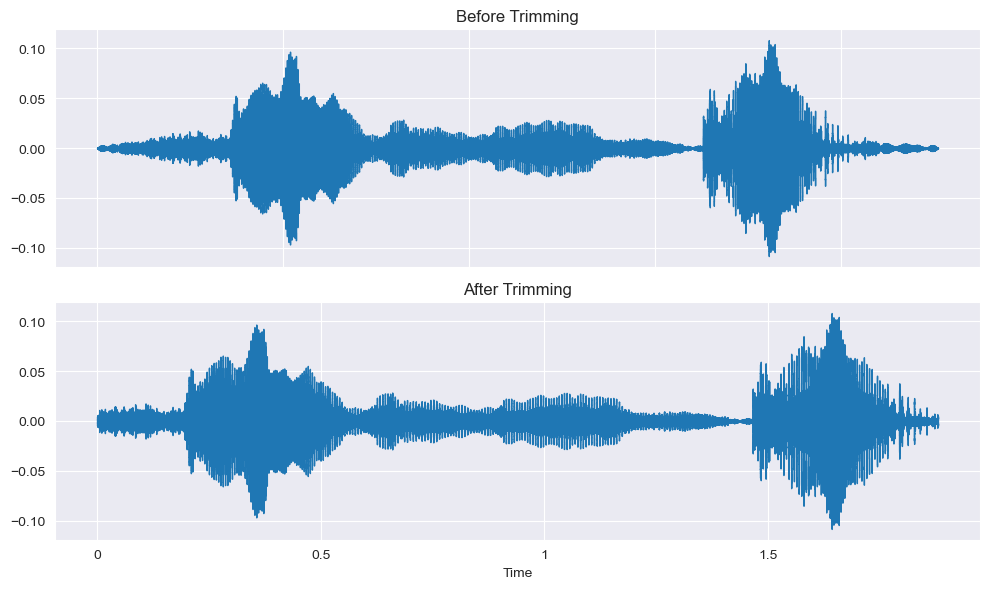

In [116]:
fig, ax = plt.subplots(nrows=2, sharey=True, figsize=(10, 6))
#before trimming
librosa.display.waveshow(data_1, sr=sampling_rate_1, ax = ax[0])
ax[0].set(title='Before Trimming')
ax[0].label_outer()
#after trimming
librosa.display.waveshow(trim(data_1), sr=sampling_rate_1, ax = ax[1])
ax[1].set(title='After Trimming')
ax[1].label_outer()
plt.tight_layout()
plt.show()

In [117]:
#feature extraction (mfcc, delta, double-delta, chroma)
#spectrogram : image hence not used

def extract_features(filename):
    with sf.SoundFile(filename) as soundFile:
        X = soundFile.read(dtype="float32")
        sampleRate = soundFile.samplerate
        res = np.array([])

        x = trim(X)
        x = custom_pitch_shift_audio(x, sampleRate, 3)
        stft = np.abs(librosa.stft(x))
        #mfcc
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sampleRate, n_mfcc=13).T, axis=0)
        res = np.hstack((res, mfccs))

        #delta
        delta_mfcc = librosa.feature.delta(mfccs)
        res = np.hstack((res, delta_mfcc))

        #double delta
        delta2_mfcc = librosa.feature.delta(mfccs, order=2)
        res = np.hstack((res, delta2_mfcc))

        #chroma
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampleRate).T, axis=0)
        res = np.hstack((res, chroma))

        return res



In [118]:
observations = ['Disgust', 'Happy', 'Sad', 'Fear','Pleasent\nSurprise', 'Angry', 'Neutral']

In [119]:
#train and test data

def loadData(test_size = 0.25):
    x, y = [], []
    for ind in df.index:
        emotion = df['Emotions'][ind]
        file = df['Path'][ind]
        feature = extract_features(file)
        x.append(feature)
        y.append(emotion) 
        
    return train_test_split(np.array(x), np.array(y), test_size=test_size, random_state=20)


In [121]:
x_train, x_test, y_train, y_test = loadData(test_size=0.25)

In [100]:
print((x_train.shape[0], x_test.shape[0]))
print('Features extracted:', x_train.shape[1])
print(x_train[0])

(2520, 280)
Features extracted: 51
[-5.31813904e+02  8.83044891e+01  7.44324541e+00  4.71670771e+00
  9.63300991e+00 -1.20782876e+00 -1.32073975e+01 -1.82529259e+01
 -1.13630829e+01 -7.81304502e+00 -1.00744858e+01  5.49332952e+00
  1.60125899e+00  2.85817528e+01  2.85817528e+01  2.85817528e+01
  2.85817528e+01  2.85817528e+01 -8.49448013e+00 -2.77829099e+00
 -1.12303531e+00  7.80362561e-02  7.80362561e-02  7.80362561e-02
  7.80362561e-02  7.80362561e-02 -3.23047447e+01 -3.23047447e+01
 -3.23047447e+01 -3.23047447e+01 -3.23047447e+01  5.23708344e+00
  1.11141181e+00  2.46258521e+00  2.59999180e+00  2.59999180e+00
  2.59999180e+00  2.59999180e+00  2.59999180e+00  2.43979007e-01
  3.16949785e-01  2.28892818e-01  2.68415153e-01  3.78023982e-01
  1.76077157e-01  1.54186368e-01  2.88289249e-01  5.48036993e-01
  8.43980610e-01  4.43308353e-01  2.21072420e-01]


In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential([
    Dense(256, activation='relu', input_shape=(51,)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 256)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,943 (218.53 KB)

 Trainable params: 55,431 (216.53 KB)

 Non-trainable params: 512 (2.00 KB)

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

history = model.fit(x_train, y_train_encoded,
                    validation_data=(x_test, y_test_encoded),
                    epochs=70,
                    batch_size=32)


Epoch 1/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3165 - loss: 1.8067 - val_accuracy: 0.1700 - val_loss: 5.1851
Epoch 2/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 0.9174 - val_accuracy: 0.6614 - val_loss: 0.8751
Epoch 3/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7411 - loss: 0.6889 - val_accuracy: 0.7757 - val_loss: 0.6016
Epoch 4/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7621 - loss: 0.6154 - val_accuracy: 0.8186 - val_loss: 0.4562
Epoch 5/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.5337 - val_accuracy: 0.7829 - val_loss: 0.5704
Epoch 6/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.4424 - val_accuracy: 0.7657 - val_loss: 0.5806
Epoch 7/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8402 - loss: 0.4159 - val_accuracy: 0.7329 - val_loss: 0.7735
Epoch 8/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - loss: 0.4084 - val_accuracy: 0.7571 - val_loss:

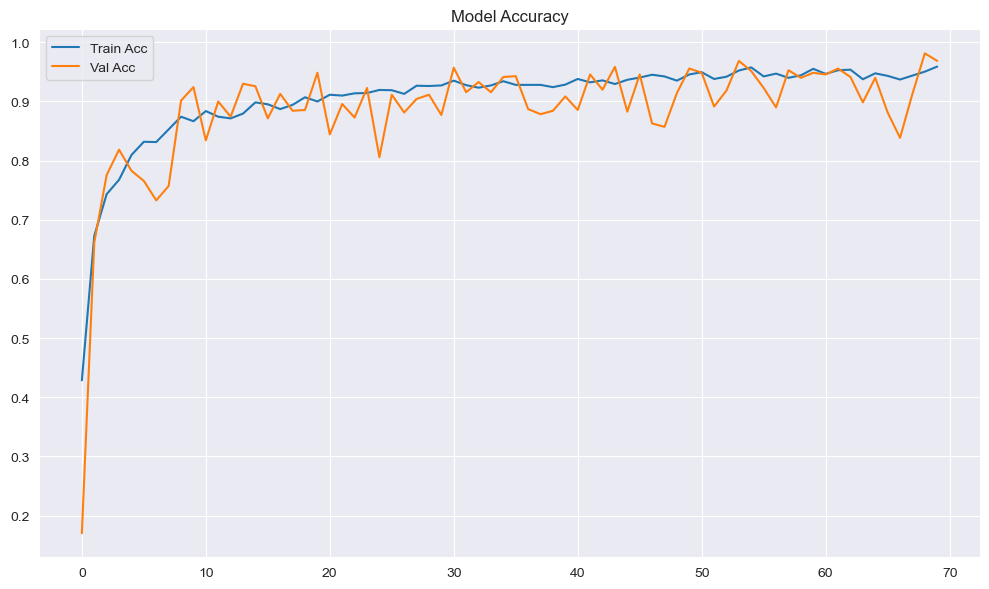

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9727 - loss: 0.1049 
Test Accuracy: 0.9685714244842529


In [145]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Test set accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_encoded)
print("Test Accuracy:", test_acc)


In [146]:
model.save("emotion_model.h5")